In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline(
    steps=[
        ("Scaler", StandardScaler()),
        ("Ridge", Ridge(alpha=1.0))
    ]
)

cv_results = cross_validate(
    model,
    data_numerical,
    target,
    cv=10,
    return_estimator=True
)

In [22]:
cv_results

{'fit_time': array([0.01101685, 0.00594711, 0.00500035, 0.00525403, 0.00524688,
        0.0051856 , 0.00492454, 0.00533271, 0.00560856, 0.00577688]),
 'score_time': array([0.00270247, 0.00201941, 0.00191784, 0.00204444, 0.00208259,
        0.00212884, 0.00211143, 0.00218368, 0.0021286 , 0.00217199]),
 'estimator': [Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge())]),
  Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge

In [23]:
for i in range(len(cv_results['estimator'])):
    print(max(cv_results['estimator'][i]['Ridge'].coef_))

20867.286383259503
20329.015171924762
19764.507912735222
20169.5926260805
19571.095410466438
22562.76919825587
20127.65597364394
20032.645971187612
17142.309984190524
19144.18916886907


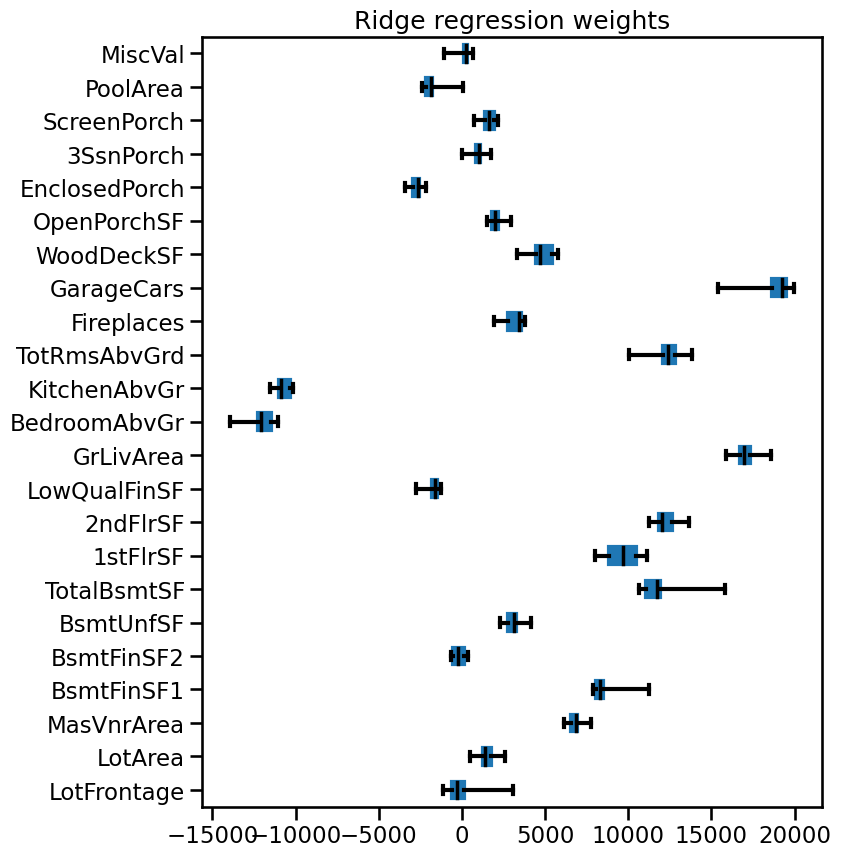

In [36]:
# can plot coef_ by following code 
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=data_numerical.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights")

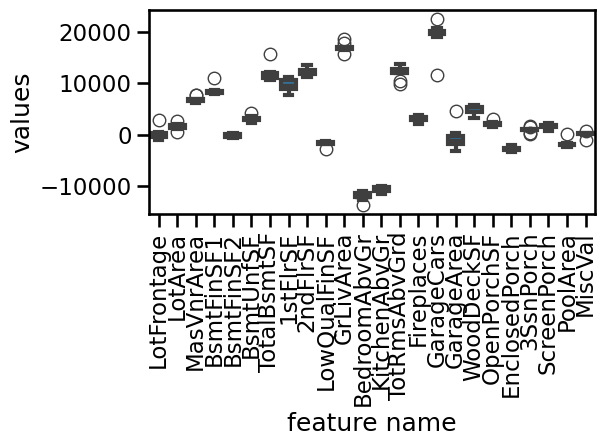

In [32]:
df_features = pd.DataFrame(
    [cv_results['estimator'][i]['Ridge'].coef_ for i in range(0,10)],
    columns=data_numerical.columns
)
df_features.head()

df_feature_long = pd.melt(df_features,var_name='feature name', value_name='values')    

df_feature_long

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="feature name", y="values", data=df_feature_long) #, order=df_features.index);
plt.xticks(rotation=90)

plt.tight_layout()

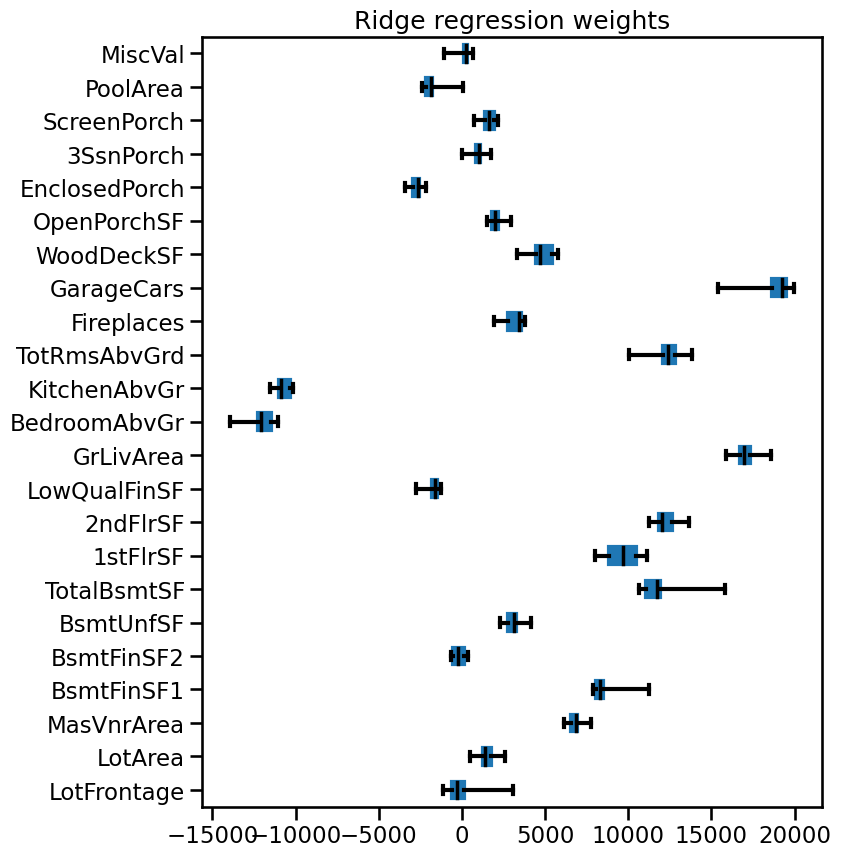

In [40]:
# Question 4: Remove feature "GarageArea",
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars",  "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]



model = Pipeline(
    steps=[
        ("Scaler", StandardScaler()),
        ("Ridge", Ridge(alpha=1.0))
    ]
)

cv_results = cross_validate(
    model,
    data_numerical,
    target,
    cv=10,
    #scoring="neg_mean_squared_error",
    return_estimator=True
)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=data_numerical.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights")



#df_features = pd.DataFrame(
#    [cv_results['estimator'][i]['Ridge'].coef_ for i in range(0,10)],
#    columns=data_numerical.columns
#)
#df_features.head()

#df_feature_long = pd.melt(df_features,var_name='feature name', value_name='values')    

#df_feature_long

#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.boxplot(x="feature name", y="values", data=df_feature_long) #, order=df_features.index);
#plt.xticks(rotation=90)

#plt.tight_layout()

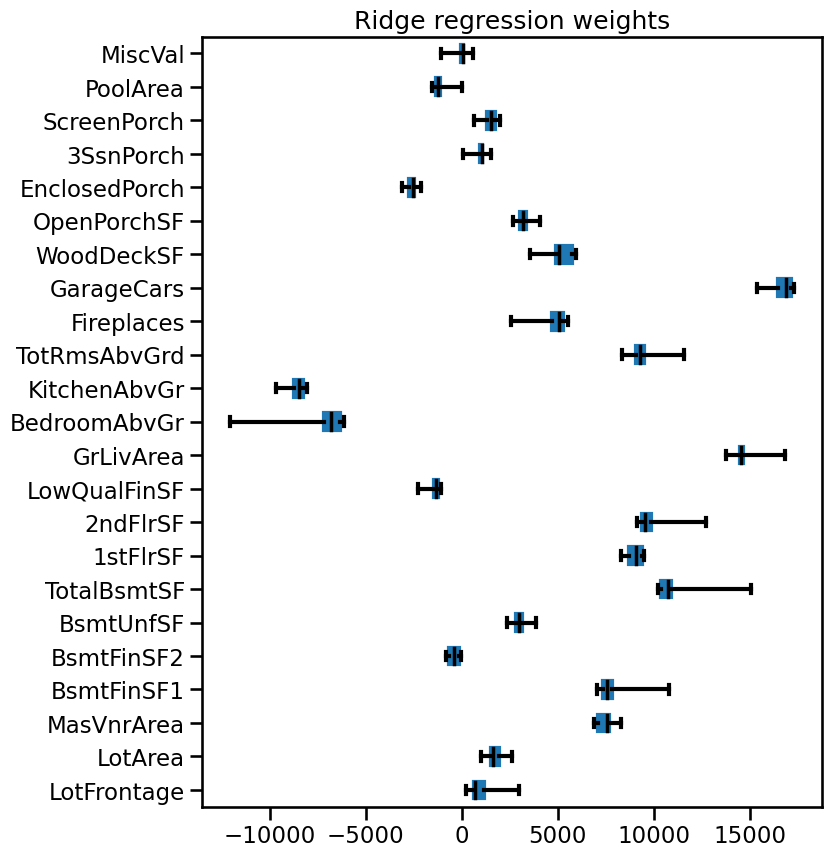

In [50]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas=np.logspace(-3, 3, num=101)

model = Pipeline(
    steps=[
        ("Scaler", StandardScaler()),
        ("Ridge", RidgeCV(alphas=alphas, store_cv_values=True))
    ]
)

cv_results = cross_validate(
    model,
    data_numerical,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_estimator=True
)


# can plot coef_ 
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=data_numerical.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights")

In [42]:
weights_ridge

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,672.603279,1562.660907,8180.728395,7912.438609,-448.324440,2928.687802,10940.767400,9325.493217,9398.315737,-1226.768011,...,9130.462616,5291.409445,16938.482356,4882.379542,3375.112572,-2125.397217,1546.774335,1512.609501,-1294.748033,108.181044
1,248.577231,1514.913208,7339.453571,7676.668284,-280.441638,2963.121475,10833.231143,9069.994151,9461.188260,-2280.257739,...,9248.765511,5095.726443,16306.325734,5776.524465,2959.562123,-2836.399590,979.179333,667.697857,-1125.212267,54.414998
2,684.666563,994.235686,7542.155007,7644.168357,-819.979002,3145.995058,10819.381532,8904.015379,9716.583517,-1362.247924,...,9500.465250,5026.522777,16743.365175,5779.296389,3030.243084,-2521.083535,1068.567251,1741.022708,-1163.709434,-1066.759728
3,753.024466,2075.488835,8287.770677,7379.862151,-745.773739,2818.972022,10411.319936,9517.588711,9915.641870,-1447.223616,...,8528.957263,4599.634992,16422.614079,4978.001163,4067.566769,-2454.391820,932.388140,1411.010459,-1330.574420,40.983506
4,1421.817662,1651.249579,6920.725916,7074.949978,-107.290838,3139.986287,10378.302281,8356.288867,9176.273657,-1438.085781,...,9063.520028,5162.321496,17202.793999,4454.217606,3137.749386,-2390.424650,1009.682606,1848.793300,-980.971358,-82.014813
5,1172.099256,1527.906522,7034.584226,7880.160822,-385.364954,2364.024045,10385.301163,9423.999346,9437.813649,-1257.191788,...,8338.007145,5424.317286,17314.719311,5180.744582,3226.331965,-2457.359544,1064.144775,1164.353376,-1344.263155,22.901433
6,549.150106,1952.763260,7555.774278,7333.576876,-26.674355,3308.290638,10909.776869,8664.427275,10249.554905,-1157.868023,...,9395.124703,4677.860810,17216.900559,5976.106671,3583.165785,-2545.442514,1391.176782,1761.346312,-1227.904852,70.542809
7,663.025043,1615.874145,7665.283744,7495.997994,-575.209867,2635.220255,10233.186832,9522.347577,9148.635599,-1049.843124,...,9342.000748,5545.011445,17040.600657,5713.576487,3307.962760,-3095.425630,1086.627563,1598.536907,-1208.368027,73.420955
8,2989.670438,2606.750080,6869.009143,10792.004563,-707.735699,3897.322058,15046.281033,8317.629497,12745.499801,-1569.218827,...,11596.486553,2571.239248,15359.616963,3543.610335,2668.117147,-2893.695279,96.665607,1288.907045,3.325273,600.304753
9,1054.091109,1861.525886,7608.102024,7344.899534,-118.022457,3044.154275,10661.634426,9052.661269,9671.697882,-1235.664574,...,9845.252993,4692.851817,16844.754161,4960.627418,3018.914690,-2524.062379,338.785521,2016.715116,-1526.206595,-52.638468


In [43]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

In [51]:
-cv_results['test_score']

array([1.07799408e+09, 1.28687981e+09, 1.22689440e+09, 2.23046033e+09,
       2.06750112e+09, 1.39889838e+09, 1.26427546e+09, 1.45121242e+09,
       5.28820582e+09, 1.07935173e+09])

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_features = categorical_columns_selector(data)

numerical_columns_selector = selector(dtype_exclude=object)
numerical_features = numerical_columns_selector(data)

#categorical_preprocessor = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("cat_preprocessor", OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ("num_preprocessor", StandardScaler(), numerical_features)
    ],
    remainder="passthrough",
)

alphas=np.logspace(-3, 3, num=101)

model_all = Pipeline(
    steps=[
        ("Preprocessor", preprocessor),
        ("Ridge", RidgeCV(alphas=alphas, store_cv_values=True))
    ]
)

new_cv_results = cross_validate(
    model_all,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_estimator=True
)



In [54]:
pd.DataFrame(
    zip(-new_cv_results['test_score'], -cv_results['test_score'])
)

,0,1
0,4.261409e+08,1.077994e+09
1,5.897777e+08,1.286880e+09
2,6.435856e+08,1.226894e+09
3,1.523728e+09,2.230460e+09
4,1.104181e+09,2.067501e+09
5,6.734476e+08,1.398898e+09
6,6.523574e+08,1.264275e+09
7,5.488648e+08,1.451212e+09
8,3.465746e+09,5.288206e+09
9,6.115059e+08,1.079352e+09


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import SplineTransformer
from sklearn.kernel_approximation import Nystroem

categorical_columns_selector = selector(dtype_include=object)
categorical_features = categorical_columns_selector(data)

numerical_columns_selector = selector(dtype_exclude=object)
numerical_features = numerical_columns_selector(data)

#categorical_preprocessor = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("cat_preprocessor", OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ("num_preprocessor", SplineTransformer(), numerical_features)
    ],
    remainder="passthrough",
)

alphas=np.logspace(-3, 3, num=101)

model_all = Pipeline(
    steps=[
        ("Preprocessor", preprocessor),
        ("Nystroem", Nystroem(kernel='poly', degree=2, n_components=300)),
        ("Ridge", RidgeCV(alphas=alphas, store_cv_values=True))
    ]
)

new_cv_results_spline = cross_validate(
    model_all,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_estimator=True
)



In [59]:
pd.DataFrame(
    zip(-new_cv_results_spline['test_score'], -new_cv_results['test_score'], -cv_results['test_score'])
)

,0,1,2
0,4.911452e+08,4.261409e+08,1.077994e+09
1,6.378677e+08,5.897777e+08,1.286880e+09
2,5.306702e+08,6.435856e+08,1.226894e+09
3,1.319336e+09,1.523728e+09,2.230460e+09
4,1.163098e+09,1.104181e+09,2.067501e+09
5,5.455204e+08,6.734476e+08,1.398898e+09
6,5.304410e+08,6.523574e+08,1.264275e+09
7,4.686340e+08,5.488648e+08,1.451212e+09
8,1.825241e+09,3.465746e+09,5.288206e+09
9,5.565036e+08,6.115059e+08,1.079352e+09
